# _**Movie EDA**_ #

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import numpy as np
import json
from ast import literal_eval

In [53]:
movies = pd.read_csv("../data/original data/movies_metadata.csv", low_memory=False)

In [54]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [55]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [56]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

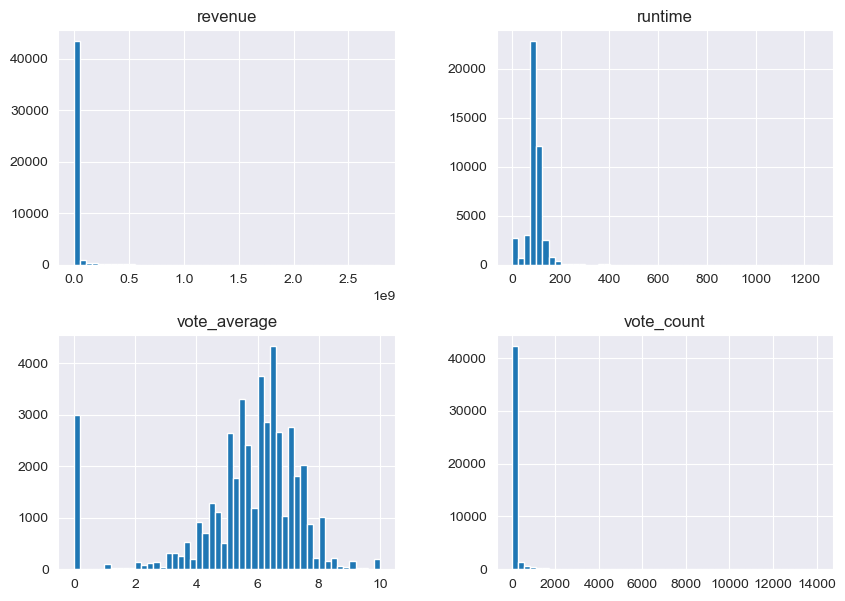

In [57]:
movies.hist(bins=50, figsize=(10, 7))
plt.show()

In [58]:
def parse_json_safe(text):
    if text is None or pd.isna(text):
        return np.nan
    if isinstance(text, (list, dict)):
        return text
    try:
        return json.loads(str(text))
    except (json.JSONDecodeError, TypeError):
        return np.nan

In [59]:
def extract_first_values(cell, key="name", max_items=3):
    data = parse_json_safe(cell)
    if not isinstance(data, list) or len(data) == 0:
        return np.nan

    values = [item.get(key) for item in data[:max_items] if isinstance(item, dict)]
    return values if values else np.nan

In [60]:
def extract_single_value(text, key="name"):
    try:
        if text == 'NANE':
            return np.nan

        parsed = literal_eval(str(text))

        if isinstance(parsed, float):
            return np.nan

        if isinstance(parsed, dict) and key in parsed:
            return parsed[key]

        return np.nan
    except (ValueError, SyntaxError, TypeError):
        return np.nan

In [61]:
def extract_as_string(cell, key="name", separator=", "):
    data = parse_json_safe(cell)
    if not isinstance(data, list):
        return np.nan

    values = [str(item.get(key)) for item in data if isinstance(item, dict) and key in item]
    return separator.join(values) if values else np.nan

In [62]:
def extract_text_values(text, key="name"):
    if pd.isna(text):
        return np.nan

    try:
        items = literal_eval(str(text))

        if isinstance(items, list):
            values = [str(item.get(key, "")) for item in items if isinstance(item, dict) and key in item]
            return values[0] if len(values) == 1 else ", ".join(values)

        if isinstance(items, dict):
            return items.get(key, np.nan)

        return np.nan

    except (ValueError, SyntaxError, TypeError):
        return np.nan


In [63]:
movies['name_belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: extract_single_value(x, key="name"))

movies['id_belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: extract_single_value(x, key="id"))

movies['poster_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: extract_single_value(x, key="poster_path"))

movies['backdrop_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: extract_single_value(x, key="backdrop_path"))


In [64]:
movies['name_genres'] = movies['genres'].apply(lambda x: extract_text_values(x, key="name"))
movies['id_genres'] = movies['genres'].apply(lambda x: extract_text_values(x, key="id"))

In [65]:
movies['name_production_countries'] = movies['production_countries'].apply(lambda x: extract_text_values(x, key="name"))
movies['iso_3166_1_production_companies'] = movies['production_countries'].apply(lambda x: extract_text_values(x, key="iso_3166_1"))

In [66]:
movies['name_production_companies'] = movies['production_companies'].apply(lambda x: extract_text_values(x, key="name"))
movies['id_production_companies'] = movies['production_companies'].apply(lambda x: extract_text_values(x, key="id"))

In [67]:
movies.drop(columns=["production_countries", "production_companies", "genres", "spoken_languages", "homepage", "poster_path", "belongs_to_collection"], inplace=True)

In [68]:
movies.head()

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,name_belongs_to_collection,id_belongs_to_collection,poster_path_belongs_to_collection,backdrop_path_belongs_to_collection,name_genres,id_genres,name_production_countries,iso_3166_1_production_companies,name_production_companies,id_production_companies
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,Toy Story Collection,10194.0,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"Animation, Comedy, Family","16, 35, 10751",United States of America,US,Pixar Animation Studios,3
1,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,NaN,NaN,NaN,NaN,"Adventure, Fantasy, Family","12, 14, 10751",United States of America,US,"TriStar Pictures, Teitler Film, Interscope Com...","559, 2550, 10201"
2,False,0,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,...,Grumpy Old Men Collection,119050.0,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"Romance, Comedy","10749, 35",United States of America,US,"Warner Bros., Lancaster Gate","6194, 19464"
3,False,16000000,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,...,NaN,NaN,NaN,NaN,"Comedy, Drama, Romance","35, 18, 10749",United States of America,US,Twentieth Century Fox Film Corporation,306
4,False,0,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,...,Father of the Bride Collection,96871.0,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,Comedy,35,United States of America,US,"Sandollar Productions, Touchstone Pictures","5842, 9195"


In [69]:
movies.shape

(45466, 27)

In [70]:
print(movies.isnull().sum())

adult                                      0
budget                                     0
id                                         0
imdb_id                                   17
original_language                         11
original_title                             0
overview                                 954
popularity                                 5
release_date                              87
revenue                                    6
runtime                                  263
status                                    87
tagline                                25054
title                                      6
video                                      6
vote_average                               6
vote_count                                 6
name_belongs_to_collection             40975
id_belongs_to_collection               40975
poster_path_belongs_to_collection      41518
backdrop_path_belongs_to_collection    42203
name_genres                                0
id_genres 

Language

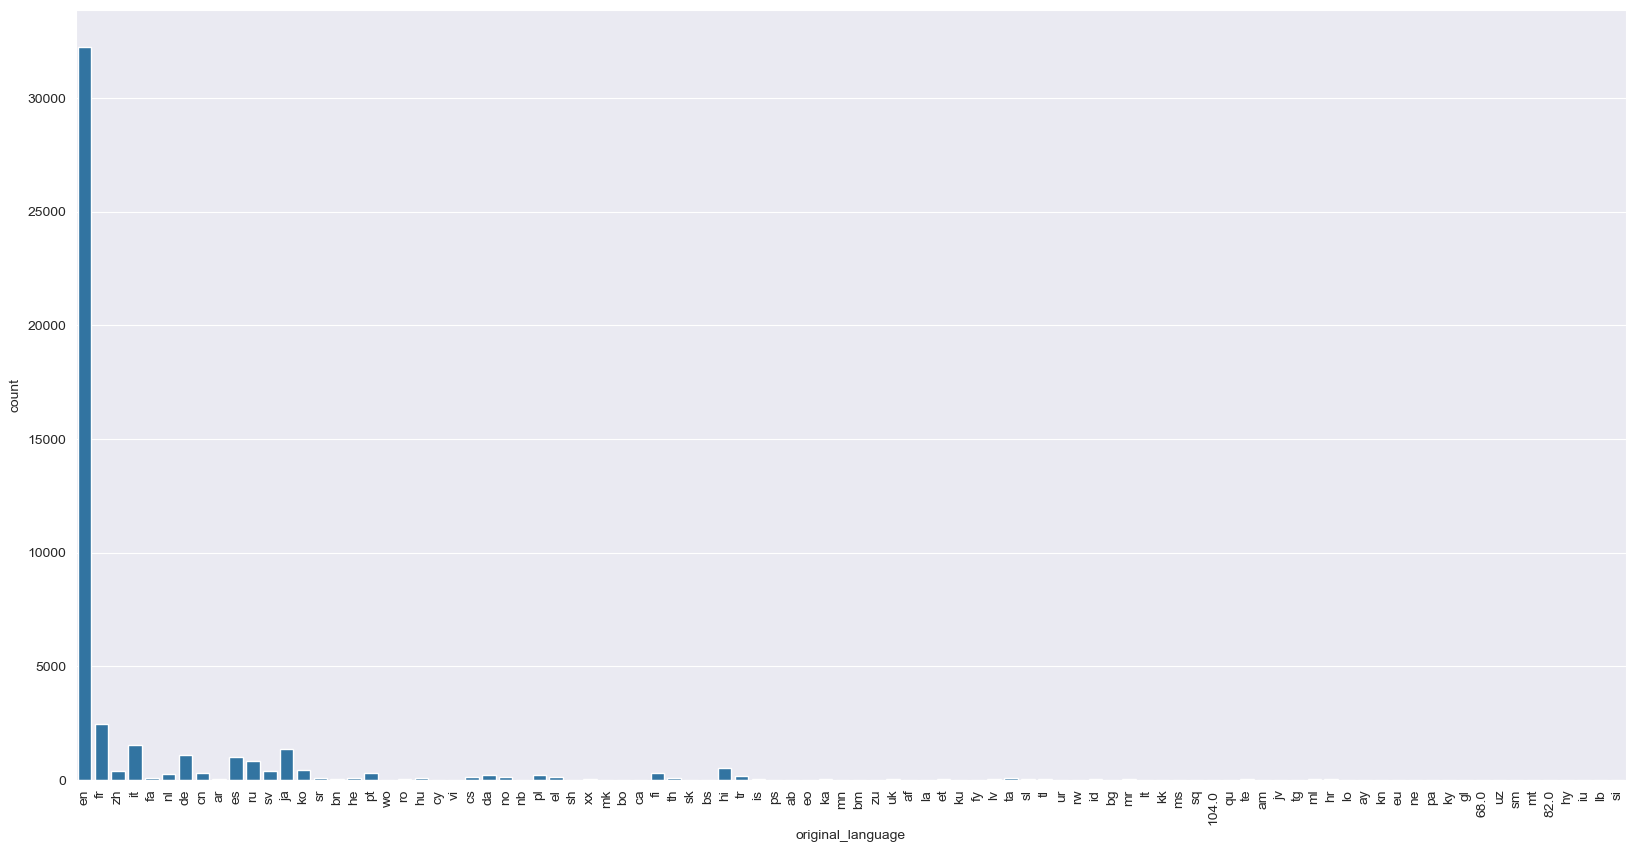

In [71]:
plt.figure(figsize=(20, 10))
sns.countplot(x=movies['original_language'])
plt.xticks(rotation=90)
plt.show()

overview

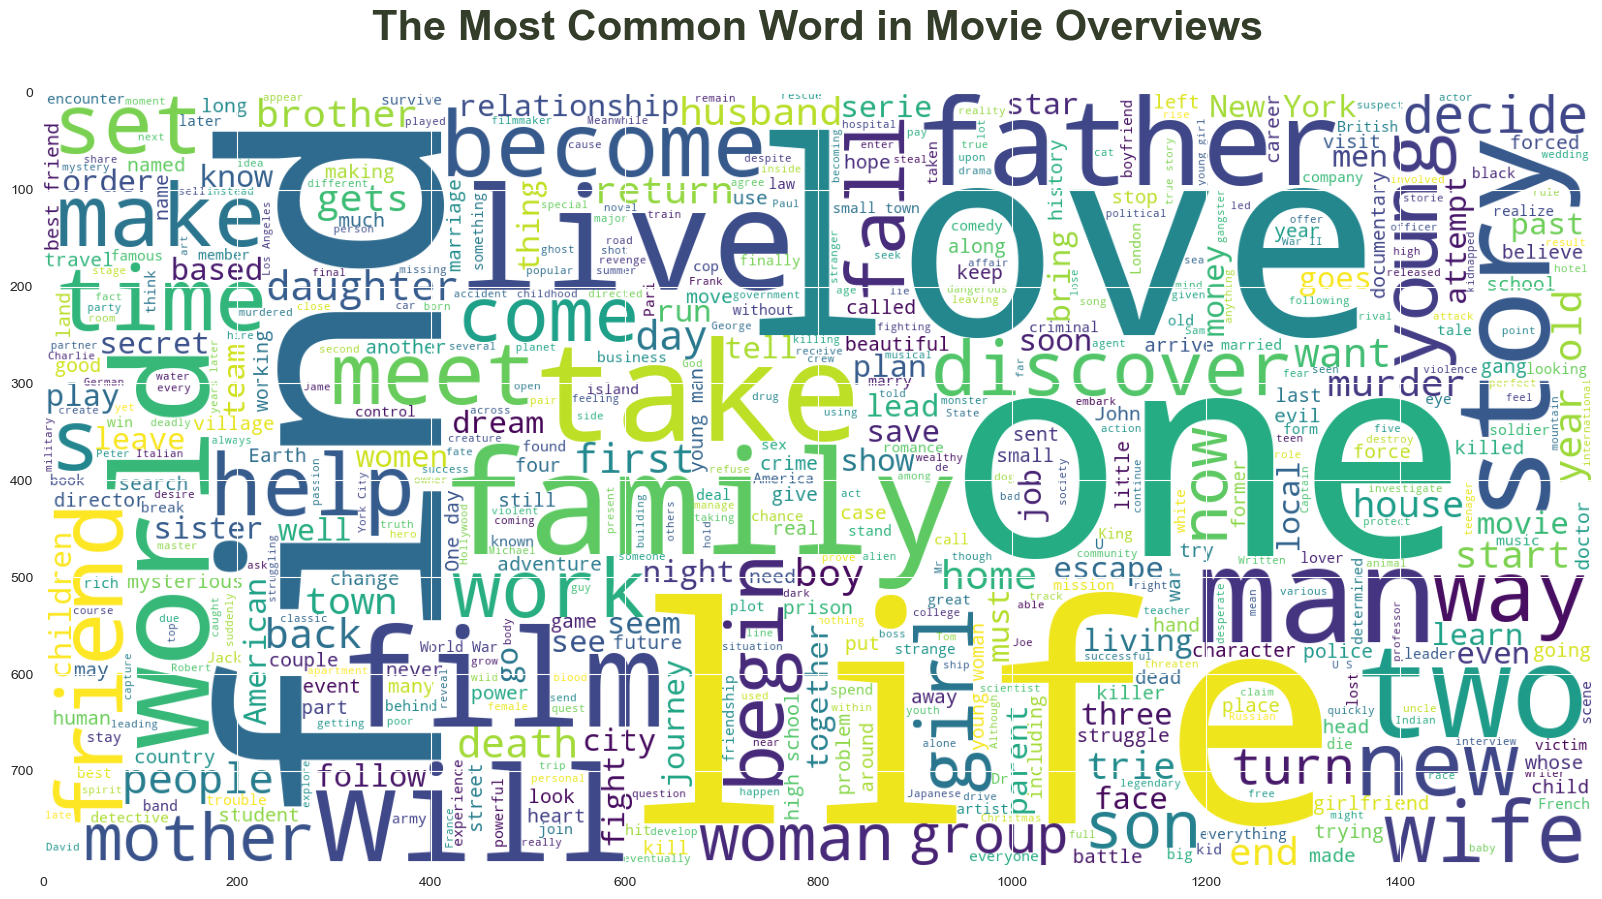

In [72]:
movies['overview'] = movies['overview'].fillna('')
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Movie Overviews\n', fontsize=30, weight=600, color='#333d29')
wc = wordcloud.WordCloud(max_words=1000, min_font_size=10,height=800,width=1600,background_color="white").generate(' '.join(movies['overview']))

plt.imshow(wc)

runtime

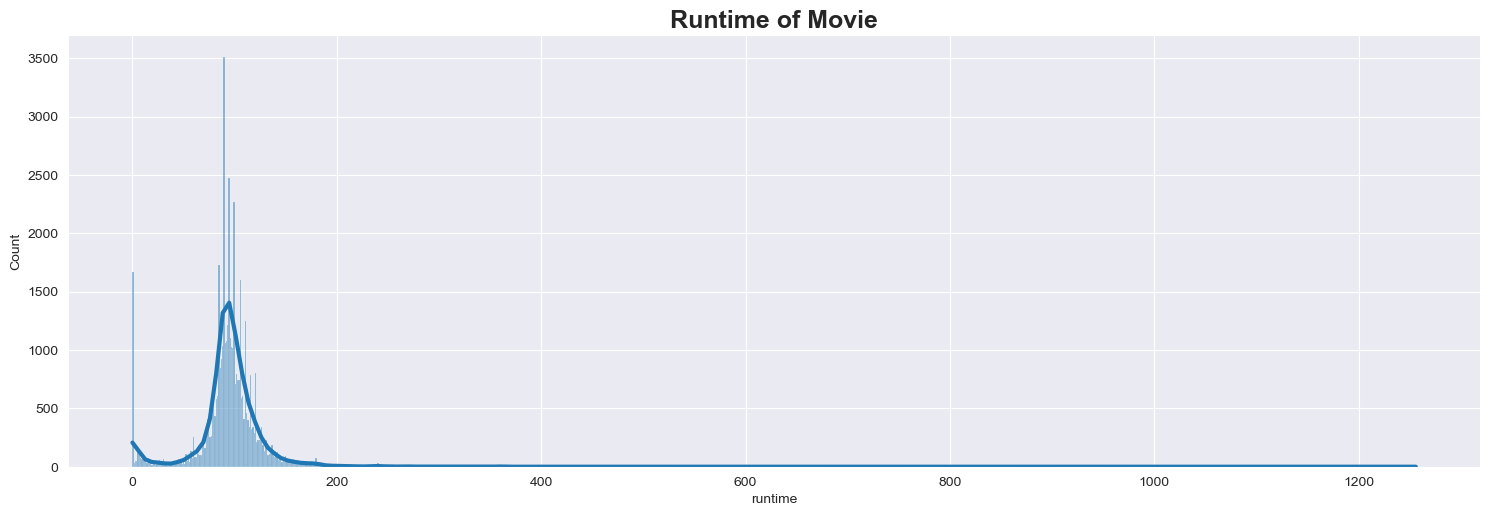

In [73]:
sns.displot(data=movies, x='runtime', kind='hist', kde=True, line_kws={'lw': 3}, aspect=3)
plt.title('Runtime of Movie', fontsize=18, weight=600)
plt.show()

new csv

In [74]:
movies.to_csv('../data/final data/movies_metadata.csv', index=False)